In [1]:
import numpy as np
import sys

In [3]:
n=int(input("enter the number of nodes"))
graph_heu=np.zeros([n,n])
graph_path=np.zeros([n,n])
s = 1
p = 1
s=int(input("enter the first node: "))
p=int(input("enter the second node: "))
heu=float(input("enter the heuristics: "))
pat=int(input("enter the path: "))
while(s!=-1 and p!=-1 and p!=-1):
    graph_heu[s][p]=heu
    graph_heu[p][s]=heu
    graph_path[p][s]=pat
    graph_path[s][p]=pat
    s=int(input("enter the first node: "))
    p=int(input("enter the second node: "))
    heu=float(input("enter the heuristics: "))
    pat=int(input("enter the path: "))
source=int(input("enter the source node: "))
dest=int(input("enter the dest node: "))

enter the number of nodes 7
enter the first node:  0
enter the second node:  1
enter the heuristics:  3
enter the path:  3
enter the first node:  0
enter the second node:  2
enter the heuristics:  5
enter the path:  5
enter the first node:  1
enter the second node:  2
enter the heuristics:  4
enter the path:  4
enter the first node:  2
enter the second node:  3
enter the heuristics:  4
enter the path:  4
enter the first node:  3
enter the second node:  5
enter the heuristics:  6
enter the path:  6
enter the first node:  1
enter the second node:  4
enter the heuristics:  3
enter the path:  3
enter the first node:  4
enter the second node:  6
enter the heuristics:  5
enter the path:  5
enter the first node:  3
enter the second node:  6
enter the heuristics:  7.11
enter the path:  0
enter the first node:  2
enter the second node:  6
enter the heuristics:  6
enter the path:  0
enter the first node:  1
enter the second node:  6
enter the heuristics:  7.11
enter the path:  0
enter the first 

In [4]:
trav=[]
path=[]
path.append([source])
count=0
k=1
ext_list=[]
ext_list.append([source])

In [5]:
if(count==0):
    list=[]
    list1=[]
    for i in range(n):
        if(graph_path[source][i]!=0 and i!=source):
            list.append([count,source,graph_path[source][i],i,graph_path[source][i]+graph_heu[i][dest]])
            list1.append(i)
    list_copy=list.copy()
    for i in range(len(list)-1):
        for j in range(0,len(list)-i-1):
            if(list[j][4]>list[j+1][4]):
                temp=list[j+1]
                list[j+1]=list[j]
                list[j]=temp
    print(list)
    c=0
    for i in range(len(list)):
        print(i)
        trav.insert(c,[(list1.index(list[i][3]))+1,list[i][0],list[i][1],list[i][2],list[i][3],list[i][4]])
        path.append([k+i,list_copy[i][0],list_copy[i][1],list_copy[i][2],list_copy[i][3],list[i][4]])
        c+=1
    k+=len(list)
    count+=1

[[0, 0, 3.0, 1, 10.11], [0, 0, 5.0, 2, 11.0]]
0
1


In [6]:
ora=sys.maxsize
while(len(trav)!=0):
    print(trav)
    while(trav[0][5]>ora or trav[0][4] in ext_list):
        trav.remove(trav[0])
        if(len(trav)==0):
            break
    if(len(trav)!=0):
        ext_list.append(trav[0][4])
        list=[]
        list1=[]
        for j in range(n):
            if(graph_path[trav[0][4]][j]!=0 and j!=source):
                list.append([trav[0][0],trav[0][4],graph_path[trav[0][4]][j]+trav[0][3],j,graph_path[trav[0][4]][j]+trav[0][3]+graph_heu[j][dest]])
                list1.append(j)
        length=trav[0][0]
        while(length>0):
            if(path[length][2] in list1 ):
                list.pop(list1.index(path[length][2]))
                list1.pop(list1.index(path[length][2]))
            length=path[length][1]
        c=0
        for i in range(len(list)):
            path.append([k+i,list[i][0],list[i][1],list[i][2],list[i][3],list[i][4]])
            if(dest!=list[i][3] and list[i][4]<ora and list[i][3] not in ext_list):
                trav.insert(c,[k+i,list[i][0],list[i][1],list[i][2],list[i][3],list[i][4]])
            elif(dest==list[i][3]):
                if(ora>list[i][2]):
                    ora=list[i][2]
            c+=1
        k=k+len(list)
        for i in range(len(trav)-1):
            for j in range(0,len(trav)-i-1):
                if(trav[j][5]>trav[j+1][5]):
                    temp=trav[j+1]
                    trav[j+1]=trav[j]
                    trav[j]=temp
                if(trav[j][5]==trav[j+1][5] and trav[j][4]>trav[j+1][4]):
                    temp=trav[j+1]
                    trav[j+1]=trav[j]
                    trav[j]=temp
        trav.remove(trav[0])

[[1, 0, 0, 3.0, 1, 10.11], [2, 0, 0, 5.0, 2, 11.0]]
[[2, 0, 0, 5.0, 2, 11.0], [4, 1, 1, 6.0, 4, 11.0], [3, 1, 1, 7.0, 2, 13.0]]
[[4, 1, 1, 6.0, 4, 11.0], [3, 1, 1, 7.0, 2, 13.0], [6, 2, 2, 9.0, 3, 16.11]]
[[3, 1, 1, 7.0, 2, 13.0], [6, 2, 2, 9.0, 3, 16.11]]


In [7]:
print(path)

[[0], [1, 0, 0, 3.0, 1, 10.11], [2, 0, 0, 5.0, 2, 11.0], [3, 1, 1, 7.0, 2, 13.0], [4, 1, 1, 6.0, 4, 11.0], [5, 2, 2, 9.0, 1, 16.11], [6, 2, 2, 9.0, 3, 16.11], [7, 4, 4, 11.0, 6, 11.0]]


In [8]:
path_main=[]
n=len(path)-1
while(n>0):
    if dest==path[n][4]:
        d=[]
        d.append(dest)
        d.append(path[n][2])
        length=path[n][1]
        while(length>0):
            d.append(path[length][2])
            length=path[length][1]
        path_main.append(d)
    n=n-1
print(path_main)

[[6, 4, 1, 0]]


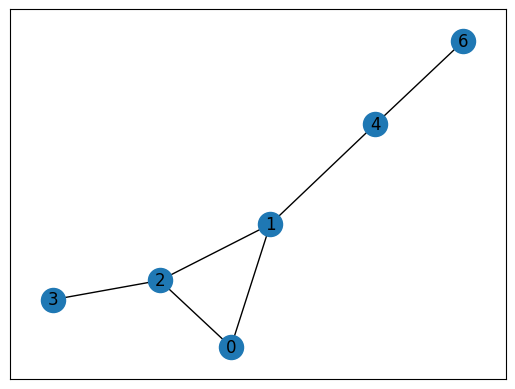

In [10]:
# First networkx library is imported
# along with matplotlib
import networkx as nx
import matplotlib.pyplot as plt


# Defining a Class
class GraphVisualization:

	def __init__(self):
		
		# visual is a list which stores all
		# the set of edges that constitutes a
		# graph
		self.visual = []
		
	# addEdge function inputs the vertices of an
	# edge and appends it to the visual list
	def addEdge(self, a, b):
		temp = [a, b]
		self.visual.append(temp)
		
	# In visualize function G is an object of
	# class Graph given by networkx G.add_edges_from(visual)
	# creates a graph with a given list
	# nx.draw_networkx(G) - plots the graph
	# plt.show() - displays the graph
	def visualize(self):
		G = nx.Graph()
		G.add_edges_from(self.visual)
		nx.draw_networkx(G)
		plt.show()

# Driver code
G = GraphVisualization()
n=len(path)-1
while(n>0):
    G.addNode()
    G.addEdge(path[n][4],path[n][2])
    n=n-1
G.visualize()
